In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-dataset/Zomato-data-.csv


In [2]:
d=pd.read_csv("/kaggle/input/zomato-dataset/Zomato-data-.csv")
d

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Data Cleaning**

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
d.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

**EDA**

* Univariate Analysis

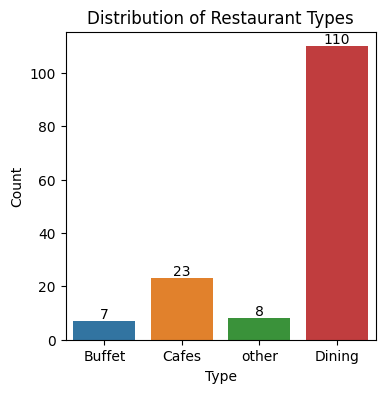

In [5]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=d, x='listed_in(type)')
plt.title('Distribution of Restaurant Types')
ax.bar_label(ax.containers[0])
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Insights obtained:
* Most of the restaurant types are dining, followed by cafes, others and buffet.

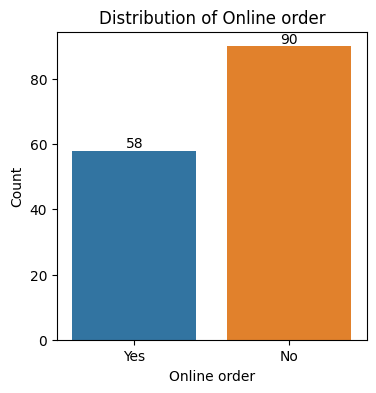

In [6]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=d, x='online_order')
plt.title('Distribution of Online order')
ax.bar_label(ax.containers[0])
plt.xlabel('Online order')
plt.ylabel('Count')
plt.show()

Insights obtained:
* Most of the customers did not opt for an online order.

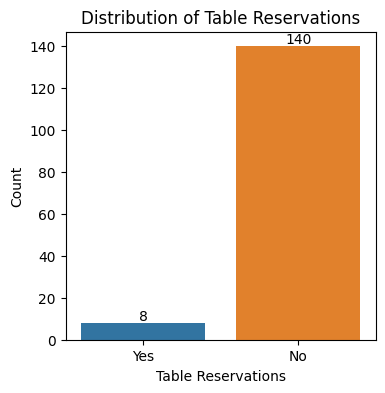

In [7]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=d, x='book_table')
plt.title('Distribution of Table Reservations')
ax.bar_label(ax.containers[0])
plt.xlabel('Table Reservations')
plt.ylabel('Count')
plt.show()

Insights obtained:
* Only a few reserved a table.

* Bivariate Analysis

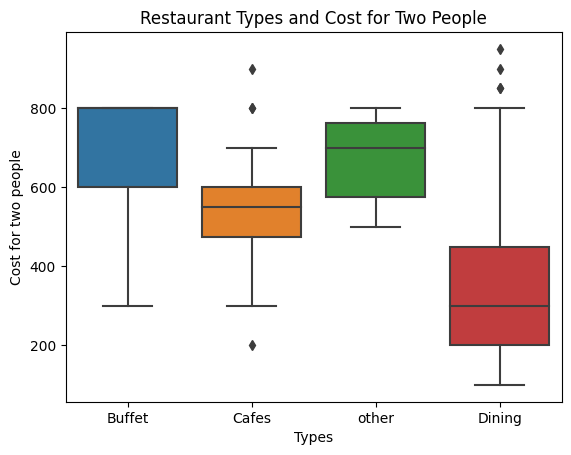

In [8]:
sns.boxplot(x=d['listed_in(type)'], y=d['approx_cost(for two people)'])
plt.title('Restaurant Types and Cost for Two People')
#ax.bar_label(ax.containers[0])
plt.xlabel('Types')
plt.ylabel('Cost for two people')
plt.show()


Insights obtained:
* Buffet and Others: The price range is between Rs 400 - 800.
* Cafes: The price range is mostly between Rs 200 - 600. Few cafes are priced Rs 800 and above.
* Dining: The price range is between Rs 200 - 800. Few dining are priced above Rs 800.
* Cafes are budget friendly.
* Dining is a luxury.

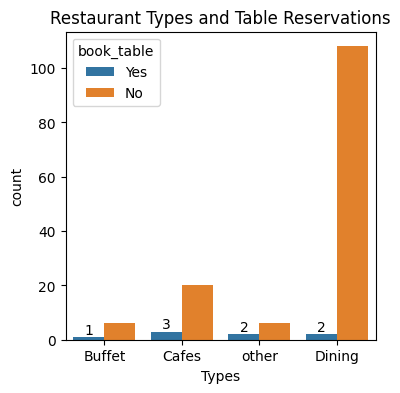

In [9]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=d['listed_in(type)'], hue=d['book_table'])
plt.title('Restaurant Types and Table Reservations')
ax.bar_label(ax.containers[0])
plt.xlabel('Types')
#plt.ylabel('Count')
plt.show()

Insights obtained:
* Mostly customers of cafes reserved tables.
* Mostly customers who dined didn't reserve tables.

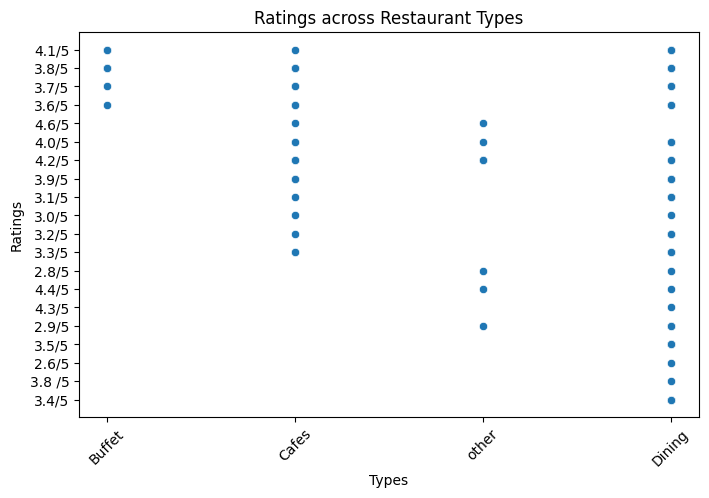

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=d['listed_in(type)'], y=d['rate'])
plt.title("Ratings across Restaurant Types")
plt.xlabel("Types")
plt.ylabel("Ratings")
plt.xticks(rotation=45)
plt.show()

Insights obtained:
* All the restaurants have ratings higer than 4.0.
  

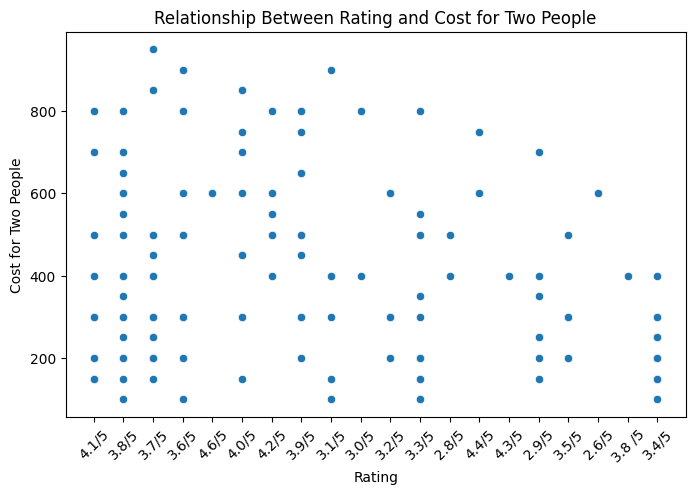

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=d['rate'], y=d['approx_cost(for two people)'])
plt.title("Relationship Between Rating and Cost for Two People")
plt.xlabel("Rating")
plt.ylabel("Cost for Two People")
plt.xticks(rotation=45)
plt.show()

Insights obtained:
* Cost is not related to the ratings.
* Expensive restaurants can have low ratings and affordable restaurants can have high ratings.